## Topic Modelling LSA 

Latent semantic analysis (LSA) adalah teknik dalam pemrosesan bahasa alami , khususnya semantik distribusional , menganalisis hubungan antara satu set dokumen dan istilah yang dikandungnya dengan menghasilkan satu set konsep yang terkait dengan dokumen dan istilah. 
langkah-langkah LSA sebagai berikut:
1. Teks Preprocessing
2. Term-document Matrix
3. Singular Value Decomposition
Singular Value Decomposition (SVD) adalah salah satu teknik reduksi dimensi yang bermanfaat untuk memperkecil nilai kompleksitas dalam pemrosesan term-document matrix. SVD merupakan teorema aljabar linier yang menyebutkan bahwa persegi panjang dari term-document matrix dapat dipecah/didekomposisikan menjadi tiga matriks, yaitu :
– Matriks ortogonal U
– Matriks diagonal S
– Transpose dari matriks ortogonal V
Yang dirumuskan dengan :

$A_{m n}=U_{m m} x S_{m n} x V_{n n}^{T}$

Keterangan:

$$\begin{array}{ll}\mathrm{A}_{\mathrm{mn}}= & \text { matriks awal } \\ \mathrm{U}_{\mathrm{mm}}= & \text { matriks ortogonal U } \\ \mathrm{S}_{\mathrm{mn}}= & \text { matriks diagonal } \mathrm{s} \\ \mathrm{V}_{n \pi}^{\top}= & \text { transpose matriks ortogonal } \mathrm{V}\end{array}$$

Hasil dari proses SVD adalah vektor yang akan digunakan untuk menghitung similaritasnya dengan pendekatan cosine similarity.

4. Cosine Similarity Measurement
Cosine similarity digunakan untuk menghitung nilai kosinus sudut antara vektor dokumen dengan vektor kueri. Semakin kecil sudut yang dihasilkan, maka tingkat kemiripan esai semakin tinggi.
Formula dari cosine similarity adalah sebagai berikut:

\begin{equation}
\cos \alpha=\frac{\boldsymbol{A} \cdot \boldsymbol{B}}{|\boldsymbol{A}||\boldsymbol{B}|}=\frac{\sum_{i=1}^{n} \boldsymbol{A}_{i} X \boldsymbol{B}_{i}}{\sqrt{\sum_{i=1}^{n}\left(\boldsymbol{A}_{i}\right)^{2}} X \sqrt{\sum_{i=1}^{n}\left(\boldsymbol{B}_{i}\right)^{2}}}
\end{equation}
 
Keterangan:

A $\quad=$ vektor dokumen

B $\quad=$ vektor kueri

A $\cdot \mathbf{B}=$ perkalian $\operatorname{dot}$ vektor $\mathrm{A}$ dan vektor $\mathrm{B}$

$|\mathrm{A}| \quad=$ panjang vektor $\mathrm{A}$

$\left.\right|^{\boldsymbol{B}} \mid \quad=$ panjang vektor $B$

$\mid \boldsymbol{A}_{|| \mathrm{B} \mid}=$ cross product antara $|\mathrm{A}|$ dan $|\mathrm{B}|$


Dari hasil cosine similarity, akan didapatkan nilai yang akan dibandingkan dengan penilaian manusia untuk diuji selisih nilainya.

In [22]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=54, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [23]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 0.37509253  0.39360307 -0.09339082 ...  0.33589865  0.11656339
   0.00513487]
 [ 0.25258446  0.38624103 -0.16435745 ... -0.13455806 -0.06948852
  -0.00265103]
 [ 0.19968743  0.44613285 -0.12019859 ... -0.05223408 -0.01276384
  -0.00139877]
 ...
 [ 0.27060809  0.3830907  -0.15837683 ... -0.02469192 -0.05962192
  -0.00377971]
 [ 0.51239198 -0.21344278 -0.03867389 ... -0.12281806  0.07044832
   0.00875634]
 [ 0.21729177  0.12623316 -0.11113206 ...  0.13205177 -0.22369885
   0.00875175]]
(54, 54)


In [24]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  37.50925312779404
Topic  1  :  39.36030682379073
Topic  2  :  -9.339081581370486
Topic  3  :  -14.374990016049995
Topic  4  :  4.780982074438378
Topic  5  :  14.460324469551974
Topic  6  :  53.033790277934315
Topic  7  :  -1.8757734562517572
Topic  8  :  3.3071326823803338
Topic  9  :  -17.133612218905416
Topic  10  :  5.942917797850023
Topic  11  :  -8.333971329349769
Topic  12  :  -15.84604604565955
Topic  13  :  2.883561902689503
Topic  14  :  1.1407506716231324
Topic  15  :  -16.424869857964257
Topic  16  :  15.096974157490328
Topic  17  :  3.2703414050691144
Topic  18  :  7.279610789085367
Topic  19  :  -0.9184694706985099
Topic  20  :  -6.040107275442681
Topic  21  :  -5.460920588298331
Topic  22  :  2.473272661288823
Topic  23  :  4.918753870392681
Topic  24  :  2.5783140490069933
Topic  25  :  -3.5756370610707617
Topic  26  :  -5.362496180896914
Topic  27  :  -1.0734463306796556
Topic  28  :  9.356262866133752
Topic  29  :  -8.671304544992541
Topic  30

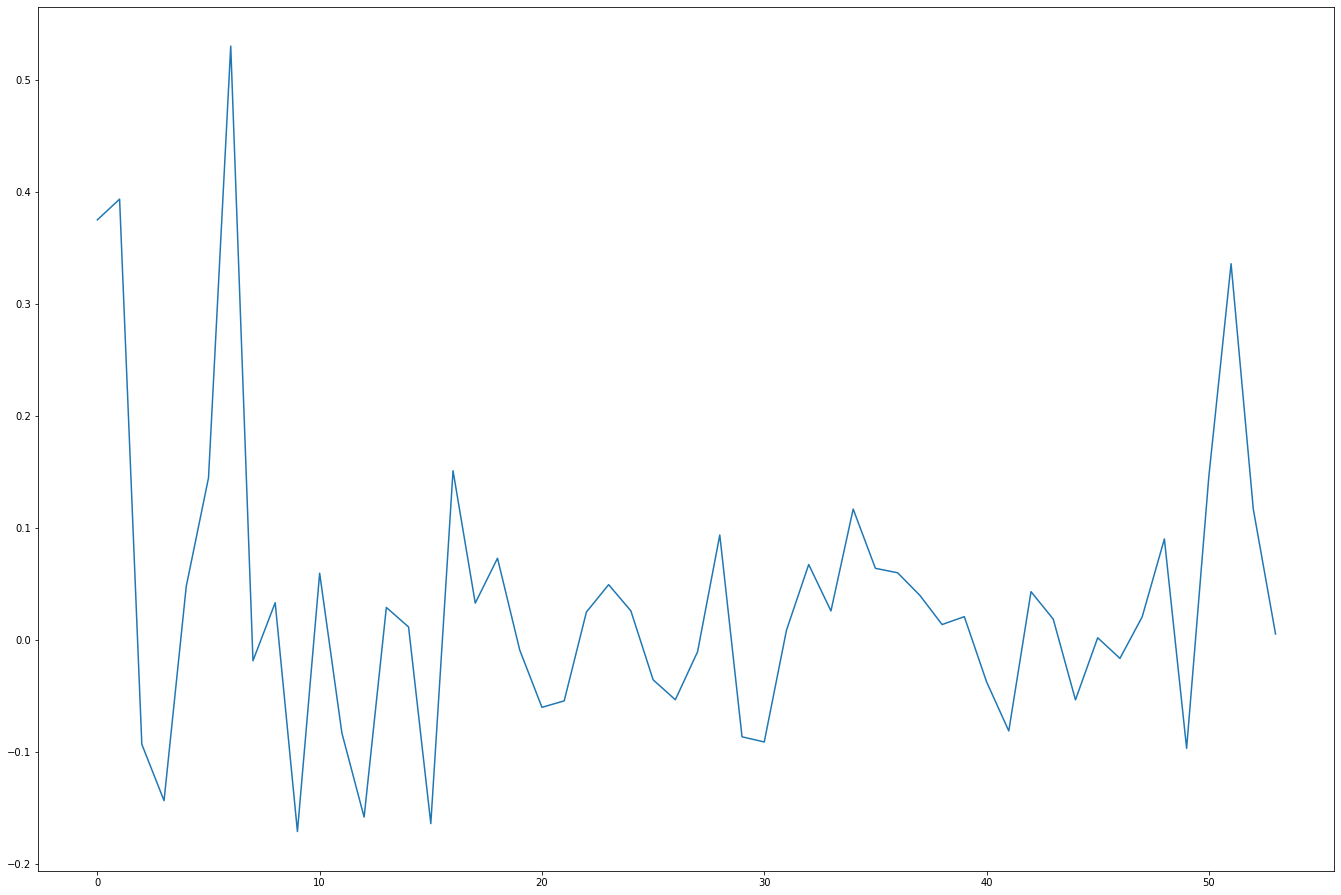

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
Nilai = topic
topic2 = l
ax.plot(topic2)
plt.show()

In [26]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(54, 1000)
[[ 0.01793765  0.01057311  0.01478683 ...  0.00011583  0.02273601
   0.00214932]
 [-0.00806968 -0.00381306 -0.00959602 ...  0.00017046 -0.01352645
   0.00578067]
 [-0.00219177 -0.00129232 -0.00516774 ...  0.00022128  0.00597366
   0.02554638]
 ...
 [-0.01057524 -0.00660838 -0.00321078 ... -0.00023272  0.0114073
   0.0009632 ]
 [-0.00331967  0.00877352  0.0019872  ... -0.00037467 -0.02429167
  -0.00080096]
 [-0.00738767 -0.00616843 -0.00573039 ...  0.00012343  0.02035091
  -0.0274028 ]]


In [27]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 0: 
variabel keputusan pembelian produk penelitian uji berpengaruh konsumen harga merek 

Topic 1: 
kerja karyawan kompensasi pegawai prestasi pesan pengembangan produktivitas kinerja pln 

Topic 2: 
saham perusahaan split stock ratio return perbedaan terdaftar harga akuisisi 

Topic 3: 
pesan iklan isi xl format kartu seluler struktur beli konsumen 

Topic 4: 
kepuasan kualitas akademik pelayanan pelanggan pesan persepsi langsung jaminan mahasiswa 

Topic 5: 
ratio perusahaan current equity profitabilitas akuisisi kompensasi terdaftar risk manufaktur 

Topic 6: 
kompensasi finansial langsung kinerja variabel saham pendidikan pengujian hipotesis nilai 

Topic 7: 
online mahasiswa merek madura universitas trunojoyo iklan produk akademik langsung 

Topic 8: 
motor merek honda sepeda psikologis perilaku dealer vario kebudayaan pribadi 

Topic 9: 
merek konsumen psikologis perilaku kebudayaan sosial pribadi kerja cair indomilk 

Topic 10: 
persepsi variabel loyalitas komunikasi merek